<a href="https://colab.research.google.com/github/Areliortiz/Simulaci-n-/blob/main/inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import random as rnd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Función para obtener el factor estacional dado un mes
def factor_estacional(mes):
    factores_estacionales = {
    1: 1.20,
    2: 1.00,
    3: 0.90,
    4: 0.80,
    5: 0.80,
    6: 0.70,
    7: 0.80,
    8: 0.90,
    9: 1.00,
    10: 1.20,
    11: 1.30,
    12: 1.40}

    return factores_estacionales.get(mes)  # devuelve factor estacional de cada mes


In [4]:
# Generamos un valor aleatorio para R
#R = random.uniform(0, 1)
def demanda(R):
  # Definimos el valor de x en función del rango de R
  if 0.000 <= R < 0.010:
      x = 35
  elif 0.010 <= R < 0.025:
      x = 36
  elif 0.025 <= R < 0.045:
      x = 37
  elif 0.045 <= R < 0.065:
      x = 38
  elif 0.065 <= R < 0.087:
      x = 39
  elif 0.087 <= R < 0.110:
      x = 40
  elif 0.110 <= R < 0.135:
      x = 41
  elif 0.135 <= R < 0.162:
      x = 42
  elif 0.162 <= R < 0.190:
      x = 43
  elif 0.190 <= R < 0.219:
      x = 44
  elif 0.219 <= R < 0.254:
      x = 45
  elif 0.254 <= R < 0.299:
      x = 46
  elif 0.299 <= R < 0.359:
      x = 47
  elif 0.359 <= R < 0.424:
      x = 48
  elif 0.424 <= R < 0.494:
      x = 49
  elif 0.494 <= R < 0.574:
      x = 50
  elif 0.574 <= R < 0.649:
      x = 51
  elif 0.649 <= R < 0.719:
      x = 52
  elif 0.719 <= R < 0.784:
      x = 53
  elif 0.784 <= R < 0.844:
      x = 54
  elif 0.844 <= R < 0.894:
      x = 55
  elif 0.894 <= R < 0.934:
      x = 56
  elif 0.934 <= R < 0.964:
      x = 57
  elif 0.964 <= R < 0.980:
      x = 58
  elif 0.980 <= R < 0.995:
      x = 59
  elif 0.995 <= R <= 1.000:
      x = 60
  else:
      x = None  # Por si acaso R no cae en ningún rango esperado

  return x #regrasa valor de x

In [5]:
# Generamos un valor aleatorio para R
R = random.uniform(0, 1)
def entregas(R):
  # Definimos el valor de x en función del rango de R usando if
  if 0.00 <= R < 0.30:
      return 1
  elif 0.30 <= R < 0.70:
      return 2
  elif 0.70 <= R <= 1.00:
      return 3
      #regresamos los meses de espera(x)



In [95]:
# Inicialización de variables
lista_inv=[]
inicial_inventario = 150
OP=0
R = 100 #nivel de reorden
q = 200 #cantidad a ordenar
orden=0
espera = 0
#listas para guardar los datos para la tabla
lista_principal = []
orden_f=[]

for i_mes in range(1,13): #se repite en los 12 meses
    u1 = rnd.random() #genera un número aleatorio entre 0 y 1
    num = demanda(u1) #valor de demanda, llama a la funcion demanda
#DEMANDA AJUSTADA:
    ajustada=round(num*factor_estacional(i_mes)) #redondea al numero mas cercano

#INVENTARIO FINAL:
    resta= inicial_inventario-ajustada
#INVENTARIO INICIAL
    OP=inicial_inventario
    lista_inv.append(inicial_inventario) # crea lista del inventario inicial

    if resta < R and espera==0:  # Revisar si el inventario final es menor que R y comprueba que no hay pedidos en espera
       #mandamos a llamar a la funcion entregas
        u2 = rnd.random()
        X = entregas(u2)
        orden += 1 #se hizo una orden
#NUMEOR DE ORDE
        orden_f.append(orden) #agrga en una lista la contidad de pedidos
        if X>1: #orden en espera
          inicial_inventario=resta
          espera= 1
        else:  #entrega de orden
          inicial_inventario=resta+q

    elif resta<100 and espera==1: # Revisar si el inventario final es menor que R y comprueba que hay pedidos en espera
        X-=1
        orden_f.append("")
        if X>1: #hay orden en espera
          inicial_inventario=resta
        else:#entrega de orden
          inicial_inventario=resta+q
          espera=0
    elif resta>100: #el inventario final tiene mas de 100, no es necesario hacer pedido
        inicial_inventario=resta
        orden_f.append("")
#CANTIDAD DE PRODUCTOS FALTANTES
    if resta <= 0:
        fal=abs(resta) #inventario en 0, Faltante es demanda insatisfecha
        resta=0
    else:
        fal=0 #inventario positivo
#PROMEDIO
    if resta==0:
        prom=(OP/2)+(OP/ajustada)
    else:
        prom=(OP+resta)/2


    lista_principal.append([i_mes, OP, u1, ajustada, resta,fal,orden_f[-1],prom]) #crea una lista con todos los datos

#Muestra la tabla
headers = ["mes", "inventario inicial", "num_aleatorio", "ajustada","final","faltante","orden","promedio"]
print(tabulate(lista_principal, headers=headers, tablefmt="grid"));



+-------+----------------------+-----------------+------------+---------+------------+---------+------------+
|   mes |   inventario inicial |   num_aleatorio |   ajustada |   final |   faltante | orden   |   promedio |
+=======+======================+=================+============+=========+============+=========+============+
|     1 |                  150 |        0.671693 |         62 |      88 |          0 | 1       |      119   |
+-------+----------------------+-----------------+------------+---------+------------+---------+------------+
|     2 |                   88 |        0.489067 |         49 |      39 |          0 |         |       63.5 |
+-------+----------------------+-----------------+------------+---------+------------+---------+------------+
|     3 |                  239 |        0.154776 |         38 |     201 |          0 |         |      220   |
+-------+----------------------+-----------------+------------+---------+------------+---------+------------+
|     4 | 

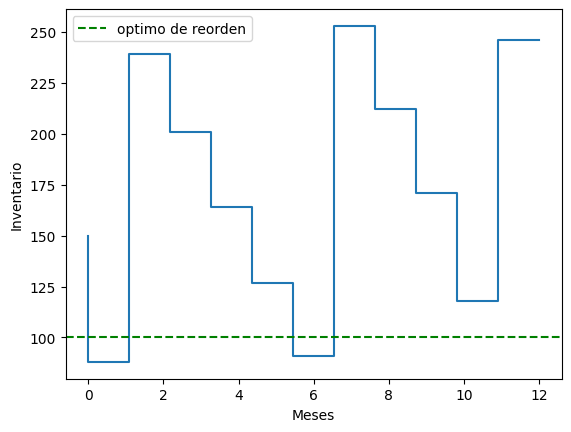

In [109]:
#SIMULACION DE UN AÑO
x=np.linspace(0,12,12)
plt.step(x,lista_inv ) #Distribución del inventario durante 1 año
plt.axhline(100, color='g', linestyle='--', label="optimo de reorden")
plt.xlabel('Meses')
plt.ylabel('Inventario')
plt.legend()
plt.show()